# ShowLens: Data Insights, Predictions & Recommendations on K-Dramas  

## Project Overview  
This project approaches a K-dramas dataset with a **data scientist’s mindset**: asking the right questions, exploring patterns, generating actionable insights, and applying predictive techniques.  
The analysis combines **Exploratory Data Analysis (EDA)**, **Predictive Modeling**, and a **Content-Based Recommendation System** to uncover trends, relationships, and similarities in the data, while helping users discover shows they might enjoy.  
The goal is not only to understand the data but also to provide insights useful for **viewers, content creators, and producers**.  

## Research Questions  
1. Which shows are the **Highest Rated of All Time**?  
2. Which shows are the **Highest Rated by Year**?  
3. Which genres produce the **Highest Rated Shows**?  
4. Which shows are the **Highest Rated in the Most Recent Two Years**?  
5. Which actors are featured in the **Highest Rated Shows**?  
6. Which factors affect a show’s **Ranking** (e.g., Rating, Number of Episodes)?  
7. Can we **predict a show’s Rank** based on its features using a simple predictive model?  
8. Can we **recommend similar shows** to users based on their favorite titles, genres, and actors?  

This framing highlights a **problem-solving approach**, combining descriptive insights with predictive and recommendation analytics, reflecting a complete **data science workflow**.


In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

# Data Wrangling / Data Preprocessing

### Initial data inspection

In [357]:
df = pd.read_csv('/content/kdrama_DATASET.csv')

In [358]:
df.head()

,Rank,Title,Year of release,Number of Episodes,Rating,Description,Genre,Tags,Actors
0,#1,Move to Heaven,2021,10,9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...","Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju..."
1,#2,Twinkling Watermelon,2023,16,9.2,"In 2023, high school student Eun Gyeol, a CODA...","Romance, Youth, Drama, Fantasy","Time Travel, Child From The Future, Sign Langu...","Ha Eun-Gyeol, Ha Yi-Chan, Choi Se-Kyung, Yoon ..."
2,#3,Moving,2023,20,9.1,"Kim Bong Seok, Jang Hui Su, and Lee Gang Hun, ...","Action, Thriller, Mystery, Supernatural","Graphic Violence, Supernatural Power, Multiple...","Ryu Seung Ryong, Han Hyo Joo, Zo In Sung"
3,#4,The Trauma Code: Heroes on Call,2025,8,9.1,"Baek Gang Hyeok, a genius trauma surgeon with ...","Action, Comedy, Drama, Medical","Surgeon Male Lead, Hospital Setting, Mentor-Me...","Ju Ji Hoon, Choo Young Woo, Ha Young, Yoon Gyu..."
4,#5,Flower of Evil,2020,16,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ..."


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                350 non-null    object 
 1   Title               350 non-null    object 
 2   Year of release     350 non-null    int64  
 3   Number of Episodes  350 non-null    int64  
 4   Rating              350 non-null    float64
 5   Description         350 non-null    object 
 6   Genre               350 non-null    object 
 7   Tags                350 non-null    object 
 8   Actors              350 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 24.7+ KB


In [360]:
df['Year of release'].unique()

array([2021, 2023, 2025, 2020, 2018, 2015, 2022, 2017, 2024, 2019, 2016,
       2014, 2003, 2012, 2013, 2009, 2011, 2010, 2006, 2007])

**Insights from Data Inspection**:

Some years are missing in the dataset, but this is acceptable for the analysis.

The column Rank is stored as Object (string) instead of Integer, which prevents proper analysis and visualization. We should convert it to an integer type.

There are no null values present in the dataset.

The Tags column is not required for our analysis, so it can be safely dropped.

### Data Cleaning

In [361]:
# Removing # from each string in Rank Column
df.loc[:,'Rank'] = df['Rank'].str[1:]

In [362]:
# Changing dtype of Rank To int
df = df.copy()
df['Rank'] = df['Rank'].astype(int)

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                350 non-null    int64  
 1   Title               350 non-null    object 
 2   Year of release     350 non-null    int64  
 3   Number of Episodes  350 non-null    int64  
 4   Rating              350 non-null    float64
 5   Description         350 non-null    object 
 6   Genre               350 non-null    object 
 7   Tags                350 non-null    object 
 8   Actors              350 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 24.7+ KB


In [364]:
# Dropping Tags Column
df.drop(columns='Tags',inplace=True)

**Insights after Data Cleaning:**

Rank column fixed: Originally stored as an object (string with # symbol).
Cleaned by removing the # prefix and converting it to int64.

Tags column dropped: Identified as irrelevant for analysis.

Data health check:
Total records: 350
No missing values across all columns.
Data types are now consistent

# Exploratory Data Analysis (EDA)

In [365]:
df_2025 = df[df['Year of release'] == 2025]
df_2024 = df[df['Year of release'] == 2024]

In [366]:
heatmap_25 = df_2025[['Title','Rank','Rating','Number of Episodes']].nlargest(columns='Rating',n=10).set_index('Title')
heatmap_24 = df_2024[['Title','Rank','Rating','Number of Episodes']].nlargest(columns='Rating',n=10).set_index('Title')

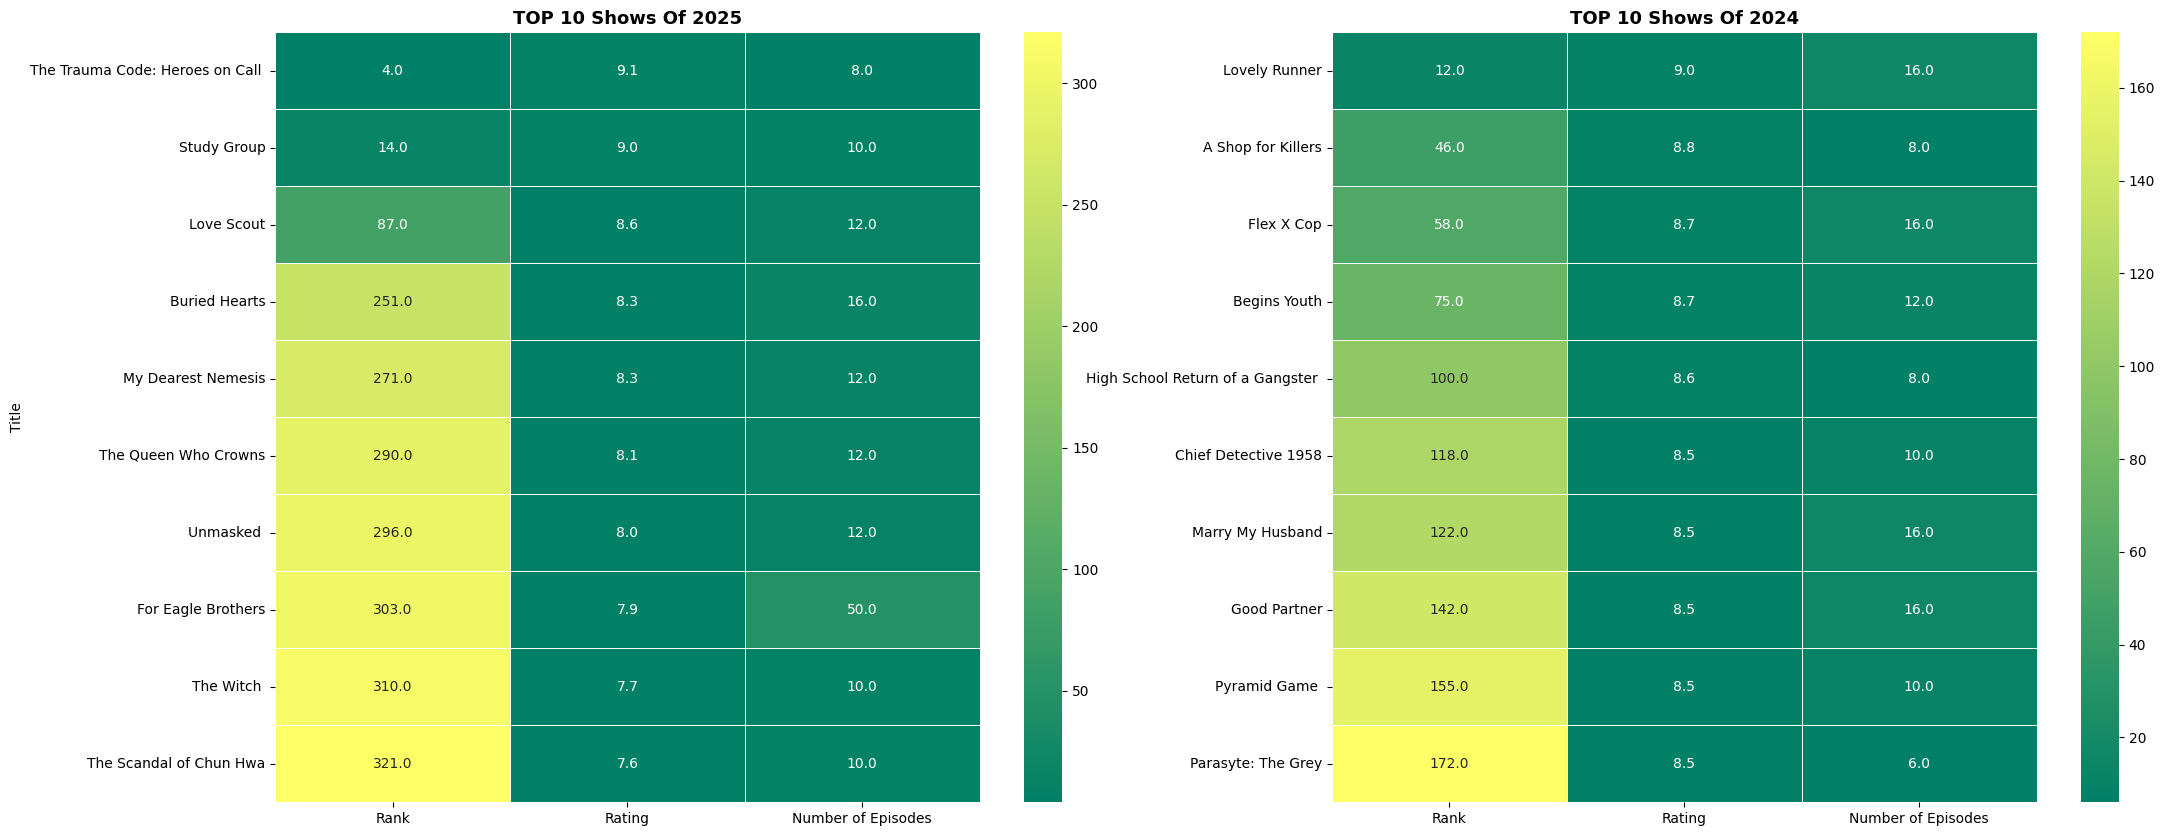

In [367]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.heatmap(data=heatmap_25,
                  annot=True,
                  linewidths = 0.5,
                  fmt='0.1f',
                  ax=ax[0],
                  cmap='summer')
sns.heatmap(data=heatmap_24,
                  annot=True,
                  linewidths = 0.5,
                  fmt='0.1f',
                  ax=ax[1],
                  cmap='summer')
ax[0].set_title('TOP 10 Shows Of 2025',fontsize=13,fontweight="bold")
ax[1].set_title('TOP 10 Shows Of 2024',fontsize=13,fontweight="bold")
ax[1].set_ylabel(None)
plt.show()

**Insights:**
The heatmap above highlights the Top 10 Shows from the past two years (2025 vs. 2024), comparing their Rank, Rating, and Number of Episodes.

It is worth noting that the 2025 data is still incomplete since the year has not yet finished. However, based on the current available data, the Top 3 shows across both years combined are:

1. The Trauma Code: Heroes on Call
2. Lovely Runner
3. Study Group

In [368]:
avg_year_rating = df.groupby('Year of release',as_index=False)['Rating'].mean()

In [369]:
avg_year_rating

,Year of release,Rating
0,2003,8.600000
1,2006,8.300000
2,2007,8.300000
3,2009,8.500000
4,2010,8.500000
5,2011,8.375000
6,2012,8.400000
7,2013,8.463636
8,2014,8.528571
9,2015,8.500000


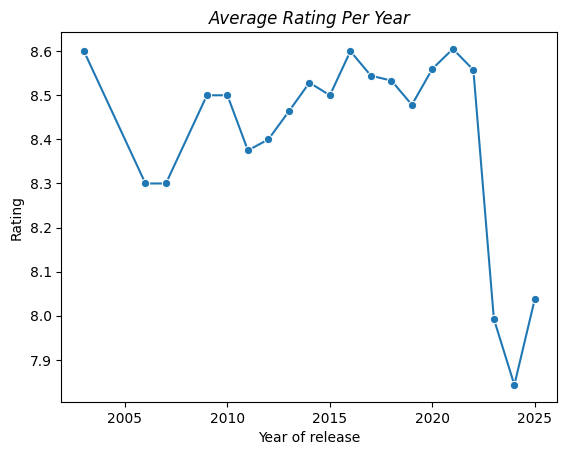

In [370]:
sns.lineplot(data=avg_year_rating, x='Year of release', y='Rating',marker='o')
plt.title('Average Rating Per Year',fontstyle='italic')
plt.show()

**Insights:**

1. **Early Stability (2003–2010):** Ratings fluctuated slightly but stayed in the mid-8.3 to 8.6 range.
2. **Strong Period (2013–2021):** There’s a consistent upward trend with average ratings peaking around **2016 and 2021** (≈ 8.6). This indicates that shows released in this period were particularly well received.
3. **Sharp Decline (2022–2024):** A noticeable drop occurs after 2021, with ratings falling to below **8.0 in 2024**, the lowest in the dataset.
4. **Partial Recovery (2025):** While still incomplete, 2025 shows a small rebound compared to 2024, but average ratings remain well below the 2016–2020 peak.



In [371]:
top_rating = df['Rating'].sort_values(ascending=False).head(11)
top_rating_df = df[df['Rating'].isin(top_rating)]

In [372]:
top_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                11 non-null     int64  
 1   Title               11 non-null     object 
 2   Year of release     11 non-null     int64  
 3   Number of Episodes  11 non-null     int64  
 4   Rating              11 non-null     float64
 5   Description         11 non-null     object 
 6   Genre               11 non-null     object 
 7   Actors              11 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 792.0+ bytes


In [373]:
top_rating_df

,Rank,Title,Year of release,Number of Episodes,Rating,Description,Genre,Actors
0,1,Move to Heaven,2021,10,9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju..."
1,2,Twinkling Watermelon,2023,16,9.2,"In 2023, high school student Eun Gyeol, a CODA...","Romance, Youth, Drama, Fantasy","Ha Eun-Gyeol, Ha Yi-Chan, Choi Se-Kyung, Yoon ..."
2,3,Moving,2023,20,9.1,"Kim Bong Seok, Jang Hui Su, and Lee Gang Hun, ...","Action, Thriller, Mystery, Supernatural","Ryu Seung Ryong, Han Hyo Joo, Zo In Sung"
3,4,The Trauma Code: Heroes on Call,2025,8,9.1,"Baek Gang Hyeok, a genius trauma surgeon with ...","Action, Comedy, Drama, Medical","Ju Ji Hoon, Choo Young Woo, Ha Young, Yoon Gyu..."
4,5,Flower of Evil,2020,16,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ..."
5,6,Hospital Playlist,2020,12,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim..."
6,7,Hospital Playlist 2,2021,12,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim..."
7,8,My Mister,2018,16,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ..."
8,9,Reply 1988,2015,20,9.1,"Five childhood friends, who all live in the sa...","Comedy, Romance, Youth, Family","Lee Hye Ri, Go Kyung Pyo, Ryu Joon Yeol, Park ..."
9,10,Weak Hero Class 1,2022,8,9.1,Yeon Shi Eun is a model student who ranks at t...,"Action, Youth, Drama","Park Ji Hoon, Choi Hyun Wook, Hong Kyung, Kim ..."


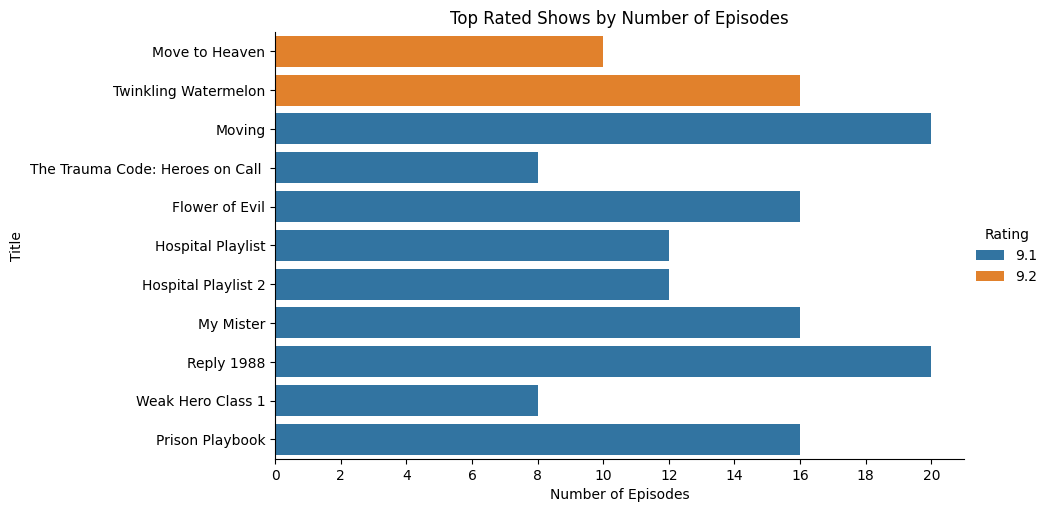

In [374]:
g = sns.catplot(data=top_rating_df, y='Title', x='Number of Episodes',
            hue='Rating', palette='tab10', height=5, aspect=2,
            kind='bar',orient='h')
g.ax.set_title("Top Rated Shows by Number of Episodes")
g.ax.set_xticks(list(range(0,21,2)))
g.ax.set_xticklabels(list(range(0,21,2)))
plt.show()

**Insights:**
The bar chart above highlights the Top 10 Shows of All Time based on the provided data. Interestingly, all 11 shows included fall within a very high rating range of 9.1 to 9.2.

This consistency in exceptional ratings suggests that these shows may serve as a valuable reference for identifying talented directors, producers, and actors who contributed to their success. Moreover, if you are a fan of K-dramas, these titles provide a reliable list to choose from depending on your mood.

### Methodology Note  

Since the dataset is more textual in nature, generating deep insights was challenging.  
To address this, I created multiple utility functions that allow flexible exploration from different perspectives:  

- **`top_movies_by_genre`** → filters shows by selected genre.  
- **`top_movies_by_actor`** → filters shows by selected actor.  
- **`bar_top_year`** → visualizes top shows by release year.  

Each function is supported by clear exception handling to manage invalid user inputs gracefully, ensuring robustness.  

This modular design provides flexibility:  
- Users can search and visualize data based on their own choice of **actor**, **genre**, or **year**.  
- The filtered DataFrame can also be exported as a CSV file for further analysis.  

In addition, I handled mixed data types effectively:  
- For example, the `Rank` column was originally in string format but was converted to integers so it could be used in my heatmap visualizations.  
- This demonstrates my ability to work with textual as well as numerical data (Year, Rating, Episodes, Rank).  

Finally, creating multiple functions to analyze the dataset from different angles shows not only technical proficiency but also my **interest and passion for exploring data thoroughly** going beyond surface-level analysis to uncover meaningful perspectives.  


In [375]:
df['Genre'] = df['Genre'].str.strip().str.split(',')

In [376]:
def top_movies_by_genre(df, genre, top_n=10, sort_by="Rating"):
    mask = df['Genre'].apply(lambda x: genre in [g.strip() for g in x])
    filtered = df[mask]
    return filtered.sort_values(by=sort_by, ascending=False).head(top_n)

In [377]:
def bar_top_genre(genre):
  df_ = top_movies_by_genre(df,genre)
  if df.empty:
    return 'Not Found!'
  g = sns.catplot(data=df_, y='Title', x='Number of Episodes',
            hue='Rating', palette='tab10', height=5, aspect=2,
            kind='bar',orient='h')
  g.ax.set_title(f"Top Rated Shows Of Genre: {genre}")
  g.ax.set_xticks(list(range(0,21,2)))
  g.ax.set_xticklabels(list(range(0,21,2)))
  plt.show()

**Automatic Insight Generation**

To make the analysis more interactive, I implemented an **Automatic Insight Generator** function.  

In [378]:
def genre_insight(genre, df):
    # filter the df first
    filtered = top_movies_by_genre(df,genre)

    if filtered.empty:
        return f"⚠️ No shows found for genre: {genre}"

    # get rating range
    min_rating = filtered['Rating'].min()
    max_rating = filtered['Rating'].max()

    # best show
    top_show = filtered.sort_values(by='Rating', ascending=False).iloc[0]

    # markdown text
    return f"""
Insight: Top Rated Shows by Genre — {genre}

The bar chart above highlights the Top {len(filtered)} {genre}-genre shows based on their ratings and number of episodes.

- The ratings range between {min_rating:.1f} and {max_rating:.1f}.
- {top_show['Title']} leads with the highest rating ({top_show['Rating']}).
- Episode counts vary, showing that high ratings are not strictly dependent on the length of the series.
- The bar chart helps viewers discover the best-rated shows by their preferred genre.
- It also provides valuable insights for directors and producers about which genres resonate most with audiences.
"""

Search Top 10 Shows By Genre: LIFE


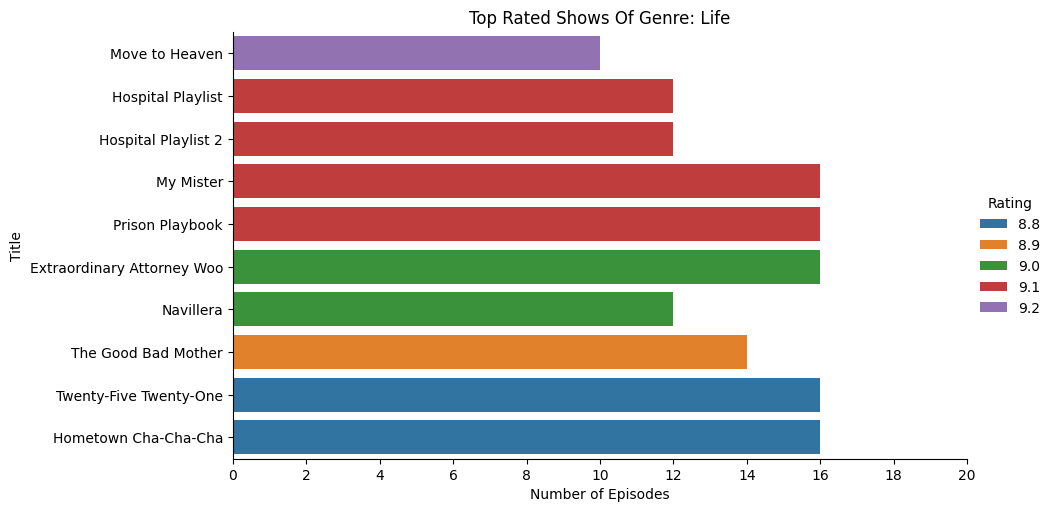


Insight: Top Rated Shows by Genre — Life

The bar chart above highlights the Top 10 Life-genre shows based on their ratings and number of episodes.  

- The ratings range between 8.8 and 9.2.  
- Move to Heaven leads with the highest rating (9.2).  
- Episode counts vary, showing that high ratings are not strictly dependent on the length of the series.
- The bar chart helps viewers discover the best-rated shows by their preferred genre.  
- It also provides valuable insights for directors and producers about which genres resonate most with audiences.



In [379]:
genre = input('Search Top 10 Shows By Genre: ').lower().capitalize()
bar_top_genre(genre)
print(genre_insight(genre, df))

In [380]:
df['Actors'] = df['Actors'].str.strip().str.split(',')

In [381]:
def top_movies_by_actor(df, Actor, top_n=10, sort_by="Rating"):
    mask = df['Actors'].apply(lambda x: Actor in [g.strip() for g in x])
    filtered = df[mask]
    return filtered.sort_values(by=sort_by, ascending=False).head(top_n)

In [382]:
def bar_top_actor(actor):
  df_ = top_movies_by_actor(df,actor)
  if df_.empty:
    return 'Not Found!'
  g = sns.catplot(data=df_, x='Title', y='Number of Episodes',
            hue='Rating', palette='tab10', height=5, aspect=2,
            kind='bar')
  g.ax.set_title(f"Top Rated Shows Of Actor: {actor}")
  plt.show()

**Automatic Insight Generation**

To make the analysis more interactive, I implemented an **Automatic Insight Generator** function.  

In [383]:
def actor_insight(actor, df):
    # filter the df first
    filtered = top_movies_by_actor(df,actor)

    if filtered.empty:
        return f"⚠️ No shows found for Actor: {actor}"

    # get rating range
    min_rating = filtered['Rating'].min()
    max_rating = filtered['Rating'].max()

    # best show
    top_show = filtered.sort_values(by='Rating', ascending=False).iloc[0]

    # markdown text
    return f"""
Insight: Top Rated Shows Of Actor — {actor}

The bar chart above highlights the Top {len(filtered)} shows of actor {actor}, based on their ratings and number of episodes.

- The ratings range between {min_rating:.1f} and {max_rating:.1f}.
- {top_show['Title']} leads with the highest rating ({top_show['Rating']}).
- Episode counts vary, showing that high ratings are not strictly dependent on the length of the series.
- The bar chart helps viewers discover the best-rated shows featuring their favorite actors.
- It also provides valuable insights for directors and producers about which actors perform well and consistently appear in highly rated shows.
"""

Search Top Shows By Actor: Yoo Yeon Seok


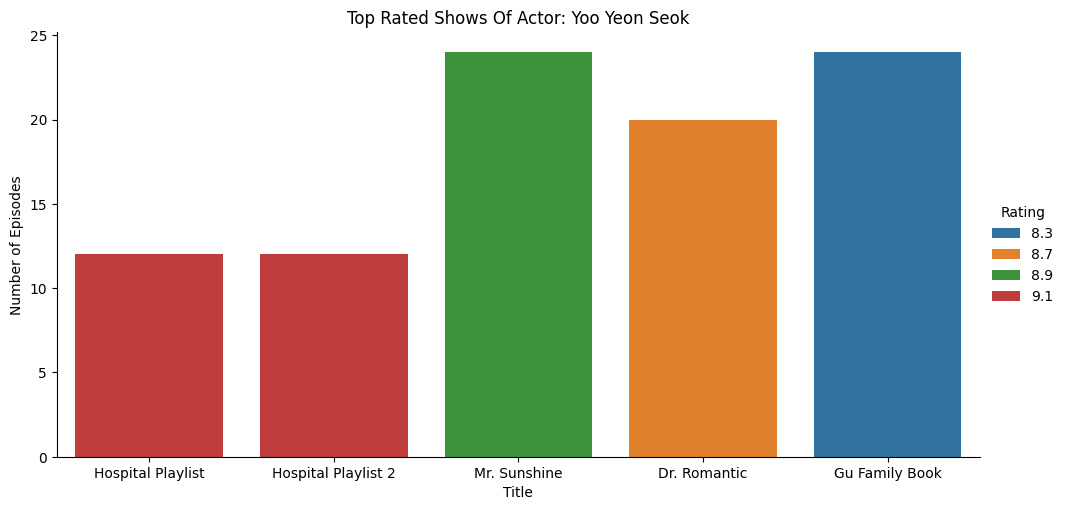


Insight: Top Rated Shows Of Actor — Yoo Yeon Seok

The bar chart above highlights the Top 5 shows of actor Yoo Yeon Seok, based on their ratings and number of episodes.  

- The ratings range between 8.3 and 9.1.  
- Hospital Playlist leads with the highest rating (9.1).  
- Episode counts vary, showing that high ratings are not strictly dependent on the length of the series.
- The bar chart helps viewers discover the best-rated shows featuring their favorite actors.  
- It also provides valuable insights for directors and producers about which actors perform well and consistently appear in highly rated shows. 



In [384]:
actor = input('Search Top Shows By Actor: ').lower().title()
bar_top_actor(actor)
print(actor_insight(actor, df))

In [385]:
def bar_top_year(year):
  df_ = df[df['Year of release'] == year]
  if df_.empty:
    return 'Not Found!'
  else:
    df_ = df_.sort_values(by='Rating',ascending=False).head(10)
  g = sns.catplot(data=df_, y='Title', x='Number of Episodes',
            hue='Rating', palette='viridis', height=5, aspect=2,
            kind='bar',orient='h')
  g.ax.set_title(f"Top Rated Shows Of Year: {year}")
  plt.show()

**Automatic Insight Generation**

To make the analysis more interactive, I implemented an **Automatic Insight Generator** function.  

In [386]:
def year_insight(year):
    # filter the df first
    filtered = df[df['Year of release'] == year]

    if filtered.empty:
        return f"⚠️ No shows found for year: {year}"

    filtered = filtered.sort_values(by='Rating',ascending=False).head(10)

    # get rating range
    min_rating = filtered['Rating'].min()
    max_rating = filtered['Rating'].max()

    # best show
    top_show = filtered.sort_values(by='Rating', ascending=False).iloc[0]

    # markdown text
    return f"""
Insight: Top Rated Shows Of Year — {year}

The bar chart above highlights the Top {len(filtered)} shows of year {year}, based on their ratings and number of episodes.

- The ratings range between {min_rating:.1f} and {max_rating:.1f}.
- {top_show['Title']} leads with the highest rating ({top_show['Rating']}).
- Episode counts vary, showing that high ratings are not strictly dependent on the length of the series.
"""

Search Top 10 Shows By Year: 2016


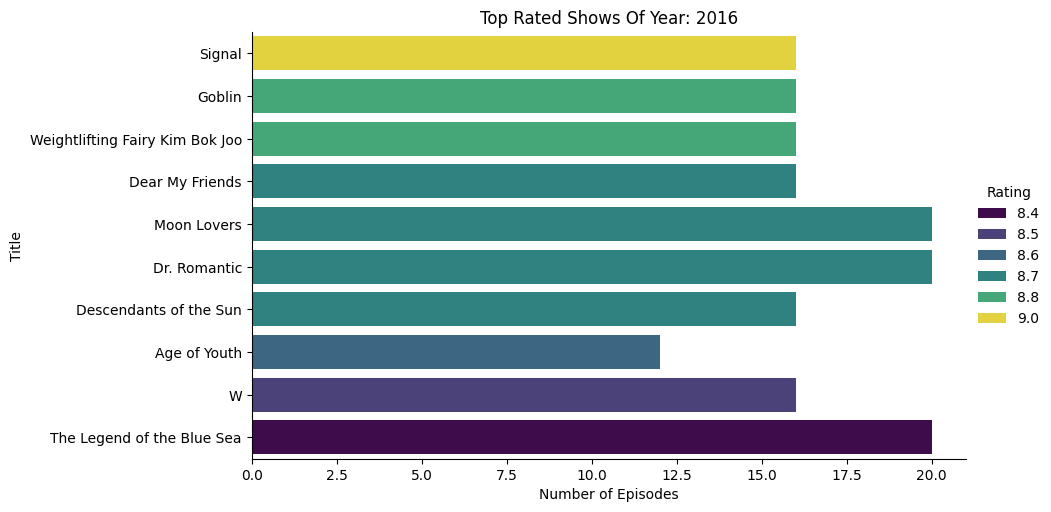


Insight: Top Rated Shows Of Year — 2016

The bar chart above highlights the Top 10 shows of year 2016, based on their ratings and number of episodes.  

- The ratings range between 8.4 and 9.0.  
- Signal leads with the highest rating (9.0).  
- Episode counts vary, showing that high ratings are not strictly dependent on the length of the series.



In [387]:
try:
  year = int(input('Search Top 10 Shows By Year: '))
except ValueError:
  print('Invalid Input!')
except Exception as e:
  print(e)
else:
  bar_top_year(year)
  print(year_insight(year))

In [388]:
df.select_dtypes(include='number').corr()

,Rank,Year of release,Number of Episodes,Rating
Rank,1.000000,0.261650,0.051761,-0.888359
Year of release,0.261650,1.000000,-0.276955,-0.347643
Number of Episodes,0.051761,-0.276955,1.000000,-0.075091
Rating,-0.888359,-0.347643,-0.075091,1.000000


**Insight:**

There is a strong negative correlation between Rank and Rating. This means that as the rating of a show increases, its rank value decreases (i.e., moves closer to Rank 1). In simpler terms: higher-rated shows tend to achieve better ranks.

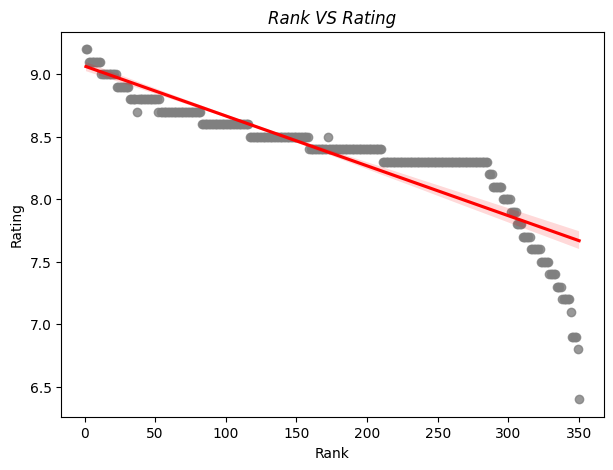

In [389]:
plt.figure(figsize=(7,5))
sns.regplot(data=df, x='Rank', y='Rating',
            line_kws={'color':'red'},
            scatter_kws={'color':'gray'})
plt.title('Rank VS Rating', fontstyle='italic')
plt.show()

Rank vs Rating = -0.888 (very strong negative correlation).

# Predictive Modeling & Recommendation System

In this section, we extend the analysis by building predictive and recommendation models. We first use linear regression to predict a show's rank based on its rating, evaluating performance with R² and RMSE.

Next, we implement a content-based recommendation system using TF-IDF vectorization of genres and actors, combined with cosine similarity, to suggest shows similar to a user-specified title. The top recommendations are visualized with a horizontal bar plot, showing ratings for easy comparison.

This section combines predictive analytics and personalized recommendations to provide actionable insights and interactive outputs.

In [432]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Features & Target
X = df[['Rating']]
y = df['Rank']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Example Prediction
rating = 8.6
sample = pd.DataFrame({'Rating': [rating]})
predicted_rank = model.predict(sample)
predicted_rank = 1 if predicted_rank[0] < 1 else predicted_rank[0]
print(f"Predicted Rank for rating {rating}:", predicted_rank)

R² Score: 0.8127146070986334
RMSE: 44.10976370605369
Predicted Rank for rating 8.6: 130.73399496282423


**Insight:**  
There is a strong relationship between higher ratings and better ranks. Ratings can be used as a reliable predictor of rank, though additional features (e.g., number of episodes, release year, popularity metrics) could further improve prediction accuracy.  

In [433]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Build Feature Column (Genres weighted)
def build_features(df, genre_weight=3):
    df['Genre'] = df['Genre'].apply(lambda g: g if isinstance(g, list) else [s.strip() for s in str(g).split(',')])
    df['Actors'] = df['Actors'].apply(lambda a: a if isinstance(a, list) else [s.strip() for s in str(a).split(',')])

    df['features'] = df['Genre'].apply(lambda g: " ".join(g * genre_weight)) + " " + df['Actors'].apply(lambda a: " ".join(a))
    return df

# Train TF-IDF and Cosine Similarity
def train_similarity(df):
    tfidf = TfidfVectorizer(stop_words="english")
    tfidf_matrix = tfidf.fit_transform(df['features'])
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return cosine_sim

def recommend_ml(title, df, cosine_sim, top_n=5):
    if title not in df['Title'].values:
        return f"'{title}' not found in dataset."

    idx = df[df['Title'] == title].index[0]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    top_indices = [i for i, _ in sim_scores[1:top_n+1]]

    return df.iloc[top_indices][['Title', 'Rating', 'Genre', 'Actors']]

# Prepare features
df = build_features(df, genre_weight=5)

# Train similarity model
cosine_sim = train_similarity(df)

Which show did you enjoy recently? I'll suggest 5 more you might love: Study Group


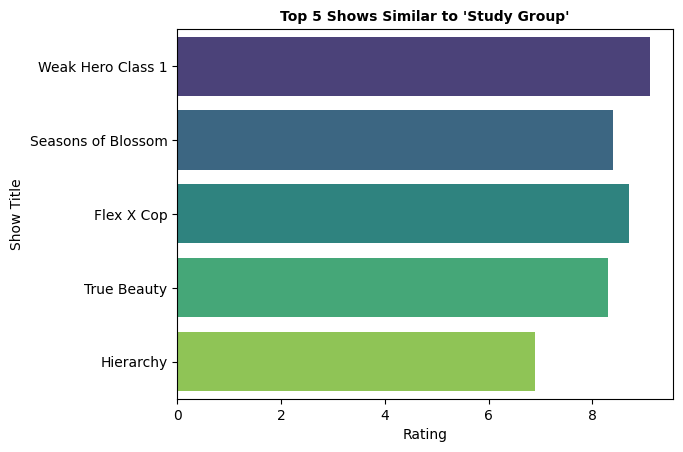

In [443]:
title = input("Which show did you enjoy recently? I'll suggest 5 more you might love: ")
rec_df = recommend_ml(title, df, cosine_sim, top_n=5)
sns.barplot(data=rec_df,
            y='Title', x='Rating', hue='Title',
            palette='viridis')
plt.title(f"Top 5 Shows Similar to '{title}'", fontsize=10, fontweight='bold')
plt.xlabel("Rating")
plt.ylabel("Show Title")
plt.show()

# Conclusion

This project demonstrates a **data scientist’s approach** to analyzing K-dramas, combining data exploration, predictive modeling, and recommendation techniques. Several key problems were addressed:

- ✅ Helped users discover shows by their favorite genres.  
- ✅ Enabled users to find shows featuring their favorite actors.  
- ✅ Provided insights for content creators on which actors perform well with audiences.  
- ✅ Highlighted which genres and types of shows have performed well recently.  
- ✅ Identified which genres consistently resonate with viewers.  
- ✅ Built a predictive model to estimate show rankings based on ratings, showing the strong link between high ratings and better ranks.  
- ✅ Developed a content-based **recommendation system** to suggest similar shows based on genres and actors, enhancing personalized viewing experiences.  

Overall, this project reflects a **complete data science workflow**: from data wrangling and exploration, to visualization, actionable insights, predictive modeling, and personalized recommendations.  

Moreover, choosing a dataset I’m passionate about—K-dramas—made the analysis engaging and meaningful, demonstrating that combining **interest-driven exploration** with structured analysis leads to both enjoyable and insightful outcomes.
